In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from myPDS import compute_and_plot_fft, LowPassFIR


In [65]:
sig_raw = np.loadtxt("raw_data.txt")

N = sig_raw.size
Fs = (N-1)/3.0


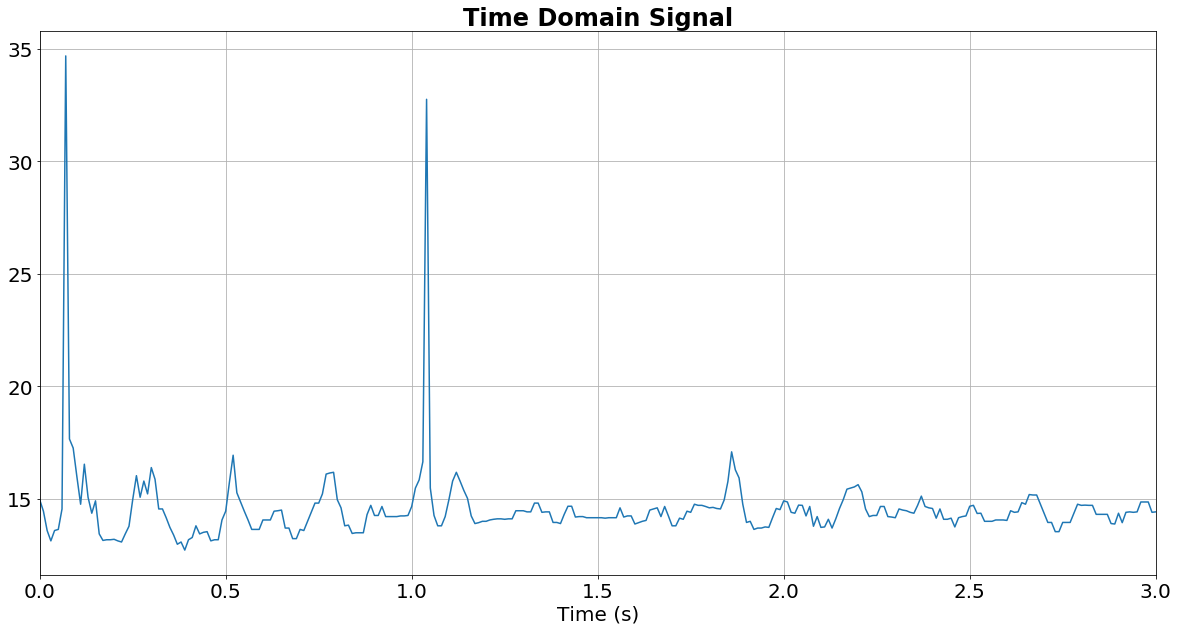

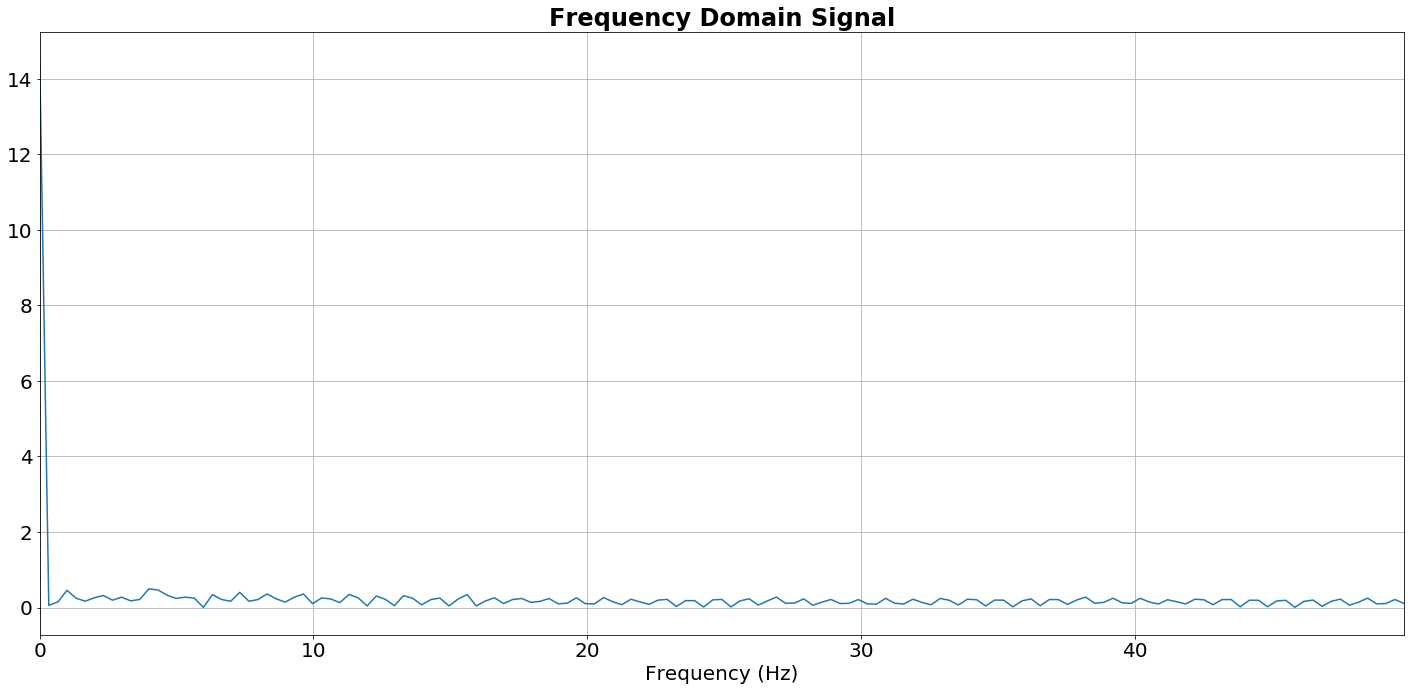

array([ 4.36872000e+03 +0.j        ,  2.18914601e+00 -8.348164j  ,
        1.13092608e+01+18.82064723j,  6.67227493e+01-15.48850356j,
        3.49448418e+00-36.5853892j ,  2.50114861e+01 +2.75688996j,
        2.11055192e+01-32.46683191j, -1.33556944e+01-45.93977528j,
        2.62390278e+01+12.99717309j,  1.42197508e+01-38.4867459j ,
       -1.41456868e+01-22.36558212j,  3.09225827e+01 +8.63068792j,
        1.11447967e+01-73.33966937j, -4.59683336e+01-52.73661565j,
       -4.36639555e+01-22.57541507j, -2.07335219e+01-29.6046256j ,
       -3.92536337e+01+12.58483674j, -3.70563602e+01 +3.73676737j,
       -3.54727589e-01 -0.18601438j, -2.42714409e+01+44.93295987j,
       -2.04012484e+01+24.41187998j, -2.20413208e+01-11.35483322j,
       -4.74760317e+01+37.24029113j,  9.88629242e+00+22.7991657j ,
       -1.85654103e+00-31.69703252j, -5.25786112e+01+13.0701807j ,
       -3.47256296e+00+34.30195363j, -8.16413044e+00+20.02308737j,
       -2.90190972e+01+29.21281821j,  4.40884441e+01+30.883232

In [66]:
compute_and_plot_fft(sig_raw, Fs)

In [166]:
fir_lp = LowPassFIR(fc=1, transition_width=5, stopband_attenuation=40, passband_ripple=0.1, Fs=100)
b = fir_lp.getFilterCoeffs()


hanning


/tmp/ipykernel_14132/2703049875.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b.T)


63

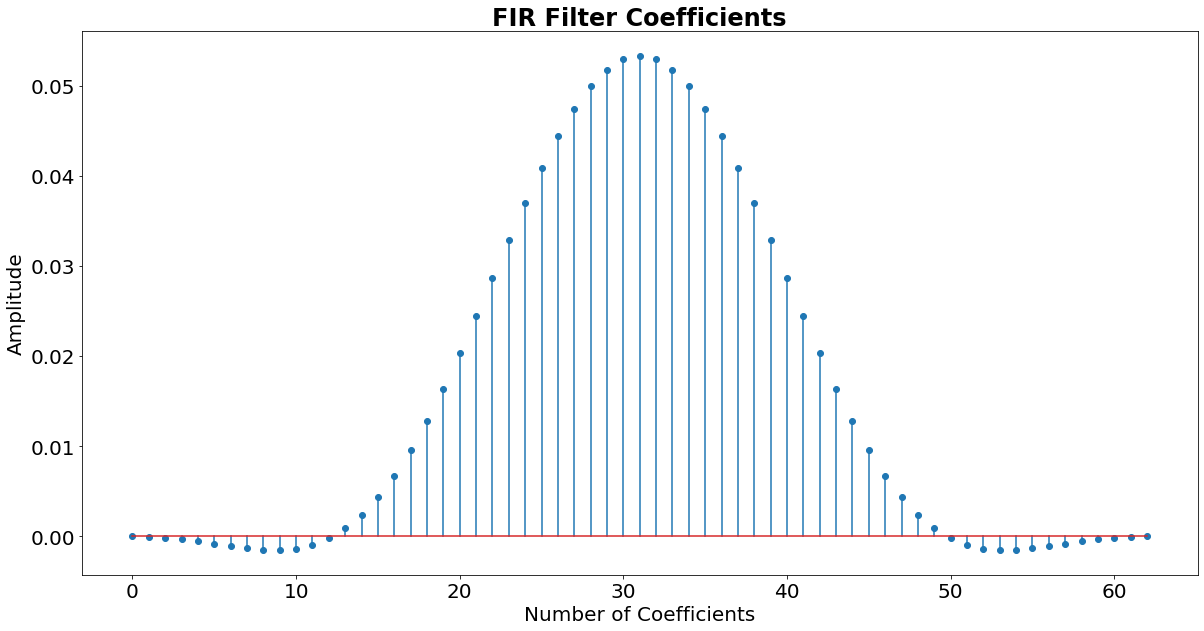

In [167]:
plt.figure(1, figsize=(20,10))
plt.title("FIR Filter Coefficients", fontweight="bold")
plt.xlabel("Number of Coefficients")
plt.ylabel("Amplitude")
plt.stem(b.T)
print(fir_lp.getWindow())
b.size

In [168]:
sig_raw = sig_raw.reshape(sig_raw.size)
b = b.reshape(b.size)

y = np.convolve(sig_raw, b)


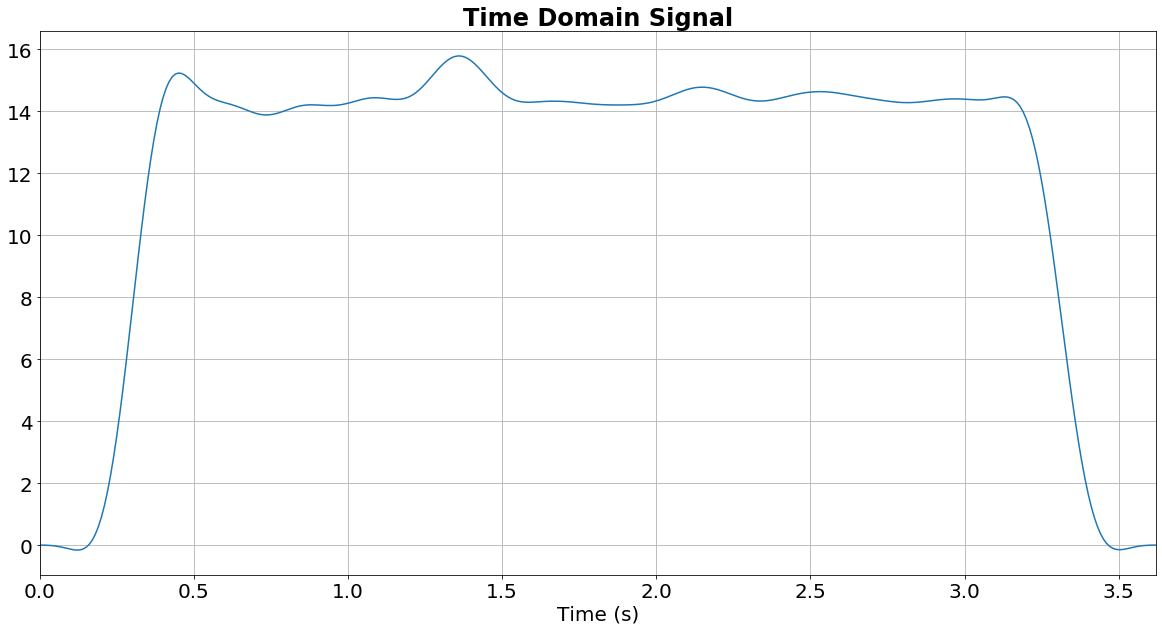

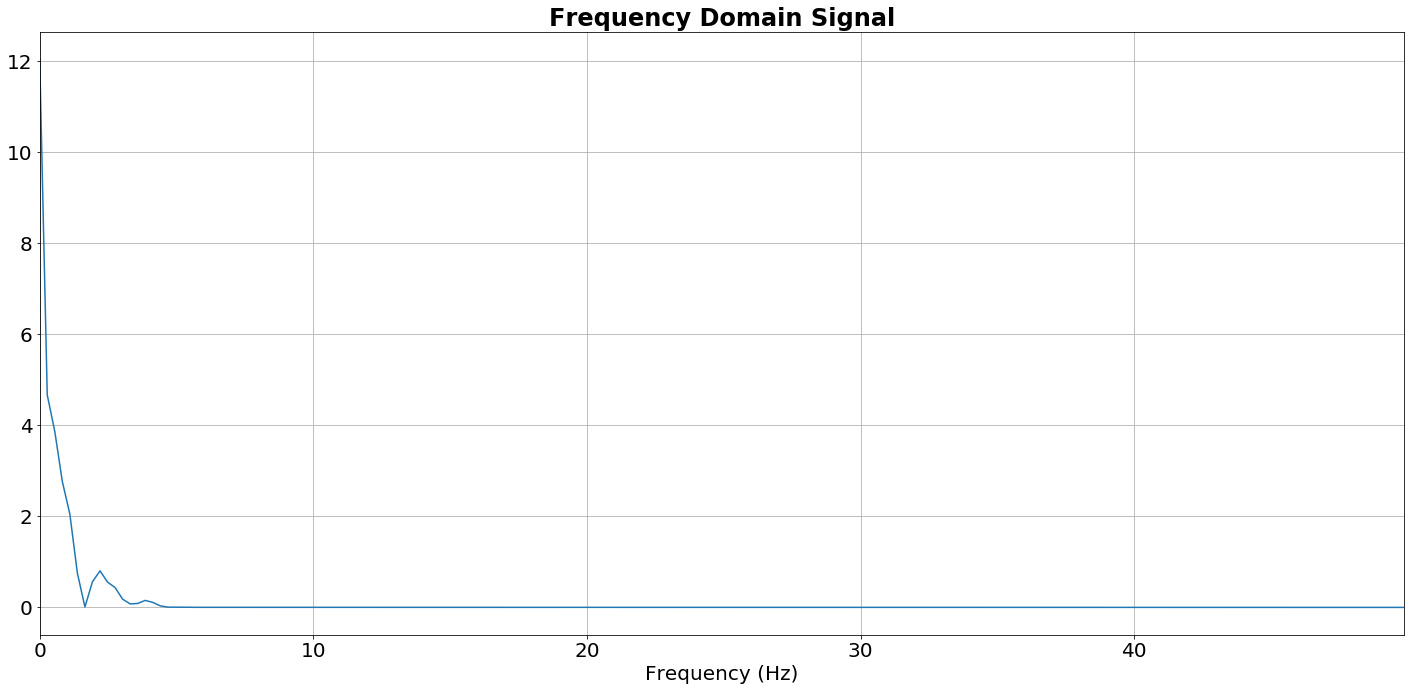

array([ 4.37119375e+03+0.00000000e+00j, -8.47445863e+02-2.33323618e+01j,
       -7.01815377e+02-1.41932047e+01j, -4.99363739e+02-5.48117310e+01j,
       -3.70911611e+02-2.76090248e+01j, -1.35179673e+02+1.82443557e+01j,
       -1.74914088e+00-4.03275352e-01j,  9.60186597e+01+3.50191712e+01j,
        1.43285366e+02+2.66713825e+01j,  1.00599440e+02-8.97937490e+00j,
        7.75877949e+01+1.53436259e+01j,  3.10583284e+01-1.09194148e+01j,
       -1.18815296e+01-7.23019756e+00j, -1.57020790e+01-1.00089810e+00j,
       -2.50981094e+01-1.21497086e+01j, -1.99049536e+01+1.77213440e+00j,
       -5.04050892e+00+3.48790991e+00j,  3.06760256e-01+1.04556133e+00j,
        7.02389064e-01+3.63970240e-01j,  2.39101704e-01-8.00902092e-02j,
       -3.88932228e-01+7.34862441e-02j, -3.10088548e-01+9.60267874e-02j,
       -3.04100835e-01+1.10229712e-01j,  2.59351424e-02-1.49769885e-01j,
        4.85299575e-02-2.48363602e-02j, -4.17601901e-02-1.03342504e-02j,
       -1.23093242e-01+4.48514351e-02j, -1.13060882

In [169]:
compute_and_plot_fft(y, Fs)

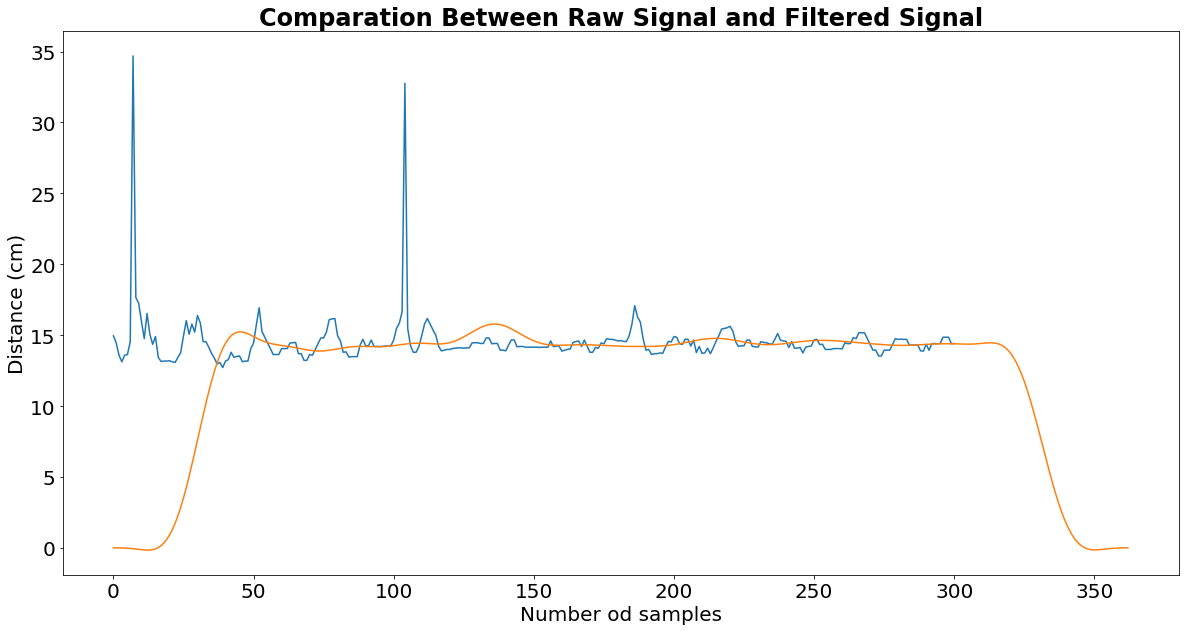

In [170]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y)

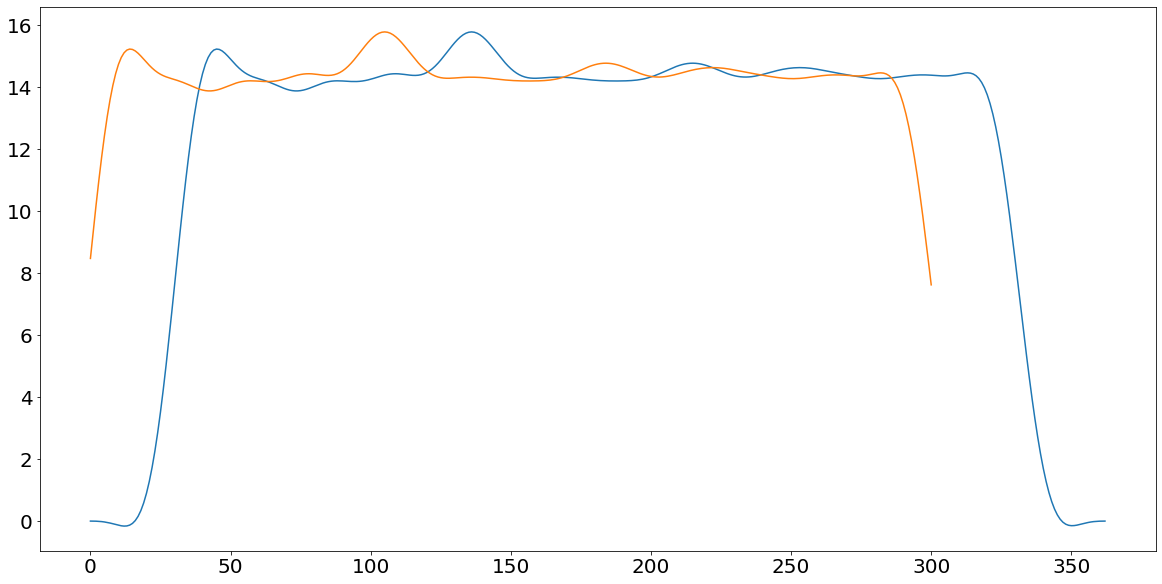

In [171]:
y1 = y[int(b.size/2):-int(b.size/2)]
plt.figure(1, figsize=(20,10))
plt.plot(y)
plt.plot(y1)

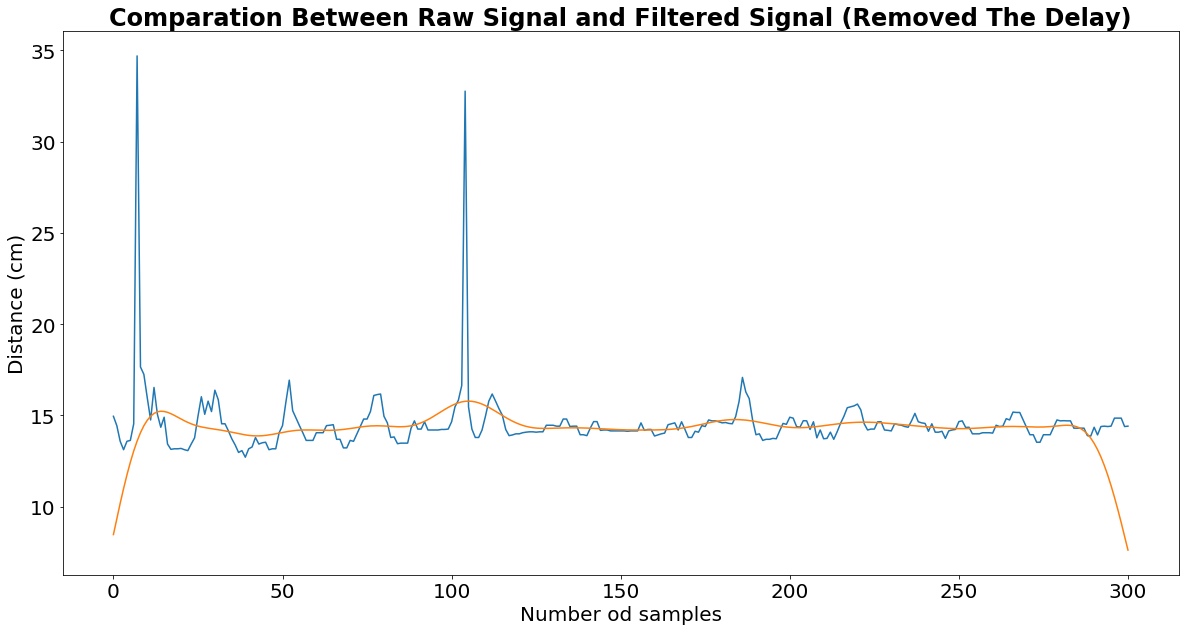

In [172]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal (Removed The Delay)", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y1)

In [173]:
from os.path import isfile
from os import remove

if isfile("filter_coeffs.txt"):
  remove("filter_coeffs.txt")

with open("filter_coeffs.txt", "a") as file:
  for coeff in b:
    file.write(str(coeff)+'\n')
  file.close()



In [174]:
max(y)

15.78085940231697

In [94]:
wf, hf = freqz(b.T, 1, worN=1024, fs=Fs)


Text(0.5, 1.0, 'Frequency Response')

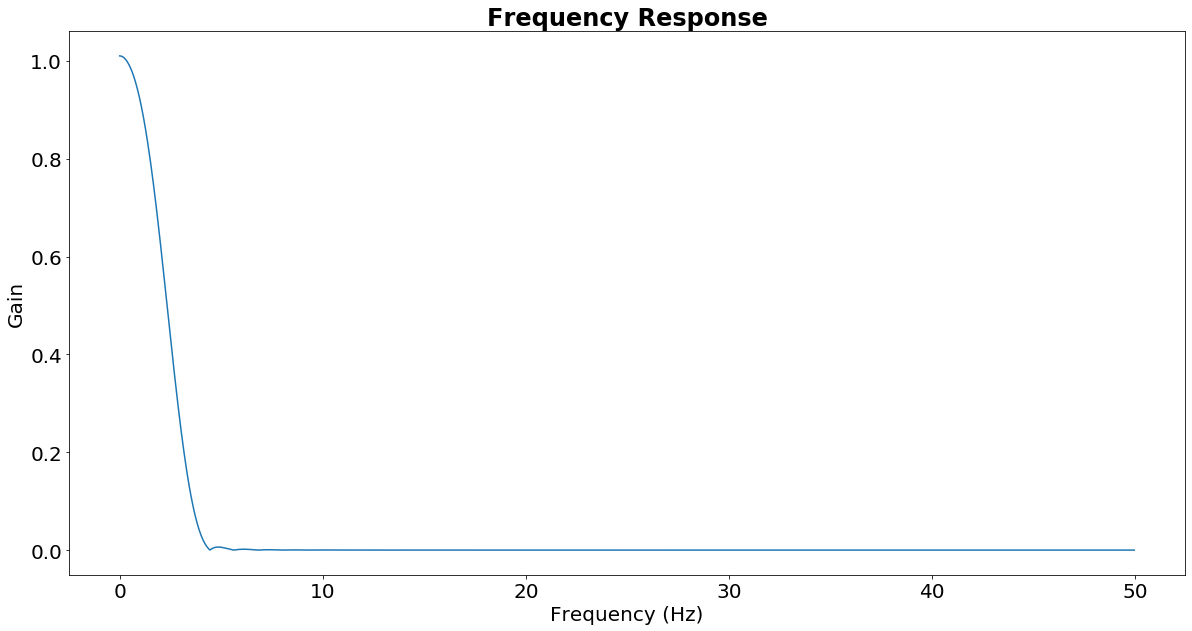

In [95]:
plt.figure(1, figsize=(20,10))
plt.plot(wf, np.absolute(hf))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency Response", fontweight="bold")


Text(0.5, 1.0, 'Frequency Response')

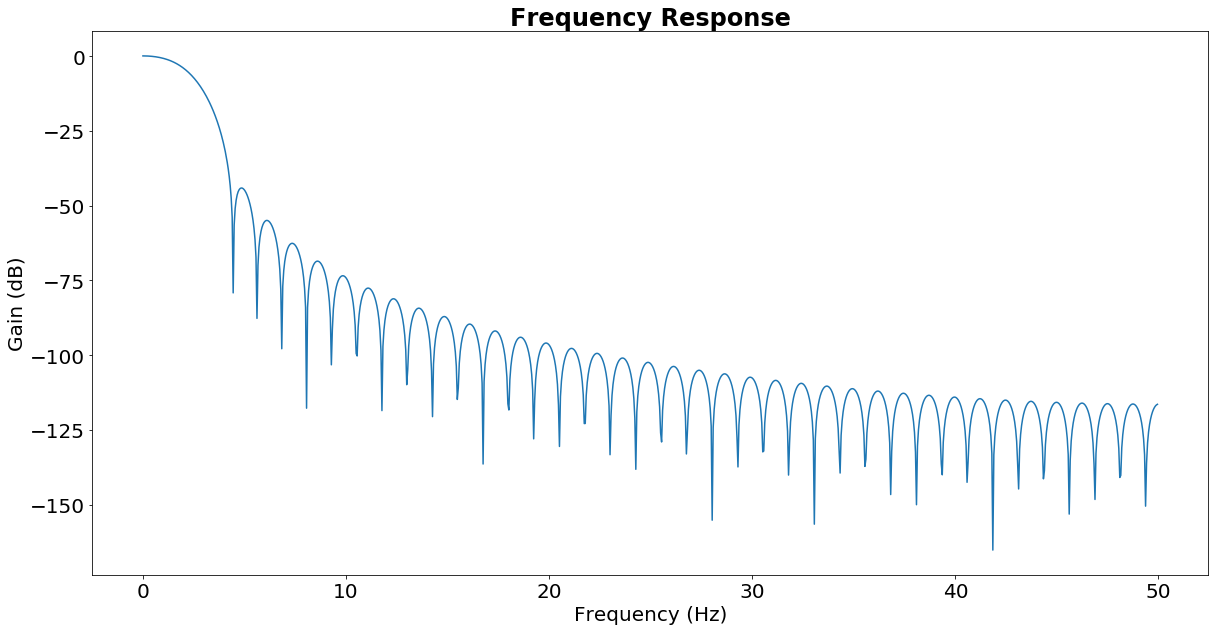

In [96]:
# Plotagem em dB
plt.figure(1, figsize=(20,10))
plt.plot(wf, 20*np.log10(np.absolute(hf)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Frequency Response", fontweight="bold")